#Dataset Projeto
Atividade com fins avaliativos referentes a disciplina de Tópicos Especiais em Processo Decisório e Sistemas de Apoio à Decisão - UESB, Jequié.

#####Discente: Carlos Elandro Bastos Pereira
#####Docente: Lucas Oliveira

[CSV e codetable do Dataset](https://drive.google.com/drive/u/2/folders/1oEgQ52T7p7vu9evi-P-z2L7kmATD2BQz)

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

plt.style.use('ggplot')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Datasets/SouthGermanCredit.csv', sep=';')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


##Estatística básica

In [ ]:
df.describe()

In [ ]:
df.sum()

In [ ]:
df.mean()

In [ ]:
df.median()

In [ ]:
df.mode().head(1)

In [ ]:
df.std()

In [ ]:
df.var()

In [ ]:
df.hist()

In [ ]:
df.hist(cumulative=True, bins=10)

In [ ]:
sns.lmplot('personal_status_sex','credit_risk', data=df)
sns.regplot(x=df['personal_status_sex'], y=df['credit_risk'], data=df, color='b')

In [ ]:
df.corr()

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Questões do Projeto a serem respondidas utilizando Machine Learning

###*Verificar grau de importância utilizando conteúdo da aula de "Classificação com Árvore de decisão"

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris, load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

y_pred = dt_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.89      0.83      0.86        71

    accuracy                           0.81       100
   macro avg       0.77      0.79      0.78       100
weighted avg       0.82      0.81      0.81       100



In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": dt_model.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
4,amount,0.136060
0,status,0.121623
1,duration,0.119982
6,employment_duration,0.073895
12,age,0.070305
3,purpose,0.062649
7,installment_rate,0.052060
2,credit_history,0.047157
5,savings,0.044221
8,personal_status_sex,0.040614


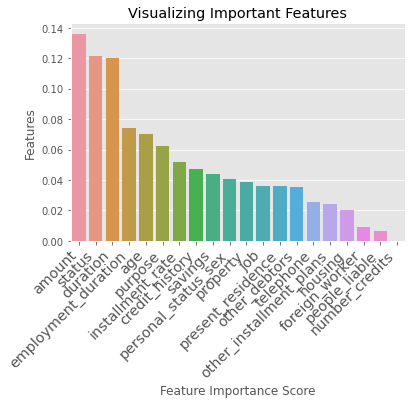

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

###*Traçar perfil daqueles com risco de inadimplência
Utilizando os campos de **amount** (montante), **personal_status_sex** (estado civil+gênero), **age** (idade) e **credit_risk** (risco de crédito) o objetivo é identificar o perfil principal daqueles que apresentam risco de crédito "ruim".

In [ ]:
bad_profile = df.loc[df.credit_risk == 0, ["amount","personal_status_sex","age","credit_risk"]]

In [ ]:
bad_profile.describe()

,amount,personal_status_sex,age,credit_risk
count,300.000000,300.000000,300.000000,300.0
mean,3938.126667,2.586667,33.960000,0.0
std,3535.818955,0.737769,11.225199,0.0
min,433.000000,1.000000,19.000000,0.0
25%,1352.500000,2.000000,25.000000,0.0
50%,2574.500000,3.000000,31.000000,0.0
75%,5141.500000,3.000000,40.000000,0.0
max,18424.000000,4.000000,74.000000,0.0


####Apresentação do perfil
---
*   amount (montante): média de 3938 DM
*   personal_status_sex (estado civil + gênero): homens casados ou viúvos
*   age (idade): média aproximada de 34 anos
*   credit_risk (risco de crédito): ruim







###*Dados financeiros da concessão de crédito
Utilizando os campos de **duration** (duração), **installment_rate** (taxa de parcelamento), **number_credits** (número de créditos) e **job** (emprego) o objetivo é identificar os dados referentes as tarifas e ao perfil de pagamento.

In [ ]:
credit_concession = df.loc[:,["duration","installment_rate","number_credits","job"]]

In [ ]:
credit_concession.describe()

,duration,installment_rate,number_credits,job
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,2.973000,1.407000,2.904000
std,12.058814,1.118715,0.577654,0.653614
min,4.000000,1.000000,1.000000,1.000000
25%,12.000000,2.000000,1.000000,3.000000
50%,18.000000,3.000000,1.000000,3.000000
75%,24.000000,4.000000,2.000000,3.000000
max,72.000000,4.000000,4.000000,4.000000


####Apresentação dos dados
---


*   duration (duração): média de 20 meses
*   installment_rate (taxa de parcelamento): 20 <= ... < 25
*   number_credits (número de créditos): 1
*   job (trabalho): empregado qualificado/oficial






###*Motivos que levaram a solicitar o crédito
Utilizando os campos de **status** (status), **purpose** (objetivo), **savings** (poupanças), **present_residence** (residência atual), **property** (propriedades), **housing** (habitação), **job** (emprego) identificaremos os motivos que levaram essas pessoas a solicitarem crédito ao banco.

In [ ]:
credit_request = df.loc[:, ["status", "purpose", "savings", "present_residence", "property", "housing", "job"]]

In [ ]:
credit_request.head()

,status,purpose,savings,present_residence,property,housing,job
0,1,2,1,4,2,1,3
1,1,0,1,2,1,1,3
2,2,9,2,4,1,1,2
3,1,0,1,2,1,1,2
4,1,0,1,4,2,2,2


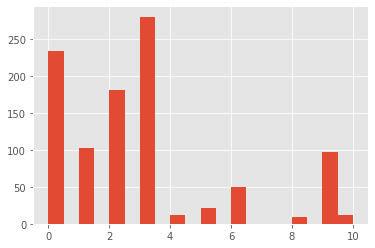

In [ ]:
df['purpose'].hist(bins=20)